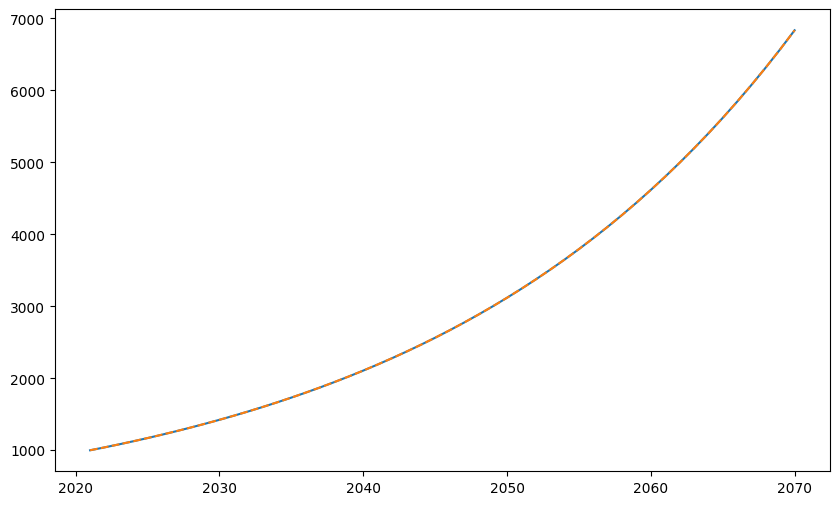

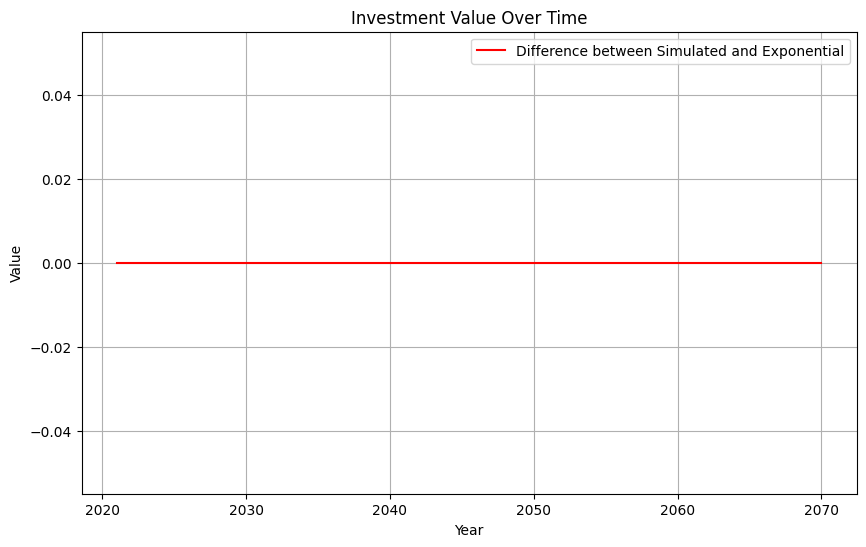

In [1]:
# 1a

import numpy as np
import matplotlib.pyplot as plt

# Initial investment and rate of return
initial_investment = 1000
r = 0.04
years = np.arange(2021, 2071)
time = years - 2021

# Calculate the value of the investment over time
values = initial_investment * (1 + r) ** time

# Plot the investment values over time
plt.figure(figsize=(10, 6))
plt.plot(years, values, label='Investment Value')

# Calculate the exponential growth function values
exp_values = initial_investment * (1 + r) ** time

# Plot the exponential growth function
plt.plot(years, exp_values, label='Exponential Growth Function', linestyle='--')

# Calculate the difference between the simulated and the exponential function
difference = values - exp_values

# Plot the difference
plt.figure(figsize=(10, 6))
plt.plot(years, difference, label='Difference between Simulated and Exponential', color='red')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Investment Value Over Time')
plt.legend()
plt.grid(True)
plt.show()


The mathematical function that best explains the plot is the exponential growth function.

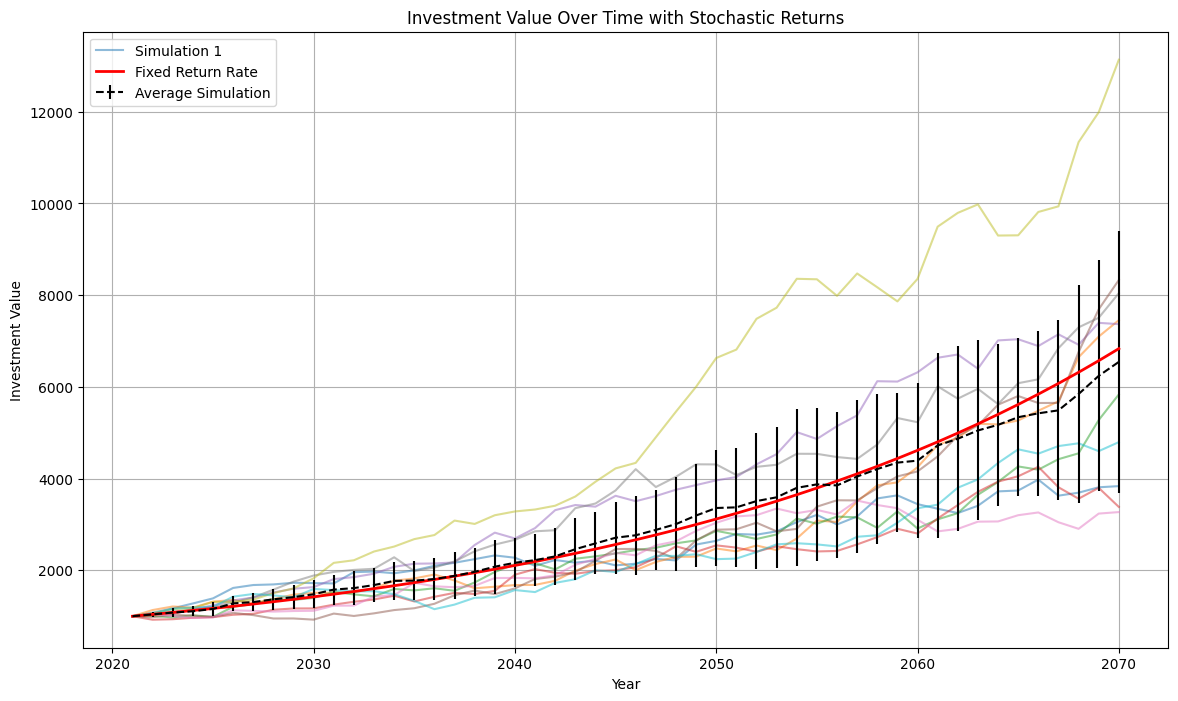

In [2]:
# 1b

import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_investment = 1000
mu = 0.04
sigma = 0.06
years = np.arange(2021, 2071)
n_simulations = 10
time = years - 2021

# Initialize arrays to store simulation results
simulations = np.zeros((n_simulations, len(years)))

# Run the simulations
for i in range(n_simulations):
    returns = np.random.normal(mu, sigma, len(years))
    values = np.zeros(len(years))
    values[0] = initial_investment
    for t in range(1, len(years)):
        values[t] = values[t-1] * (1 + returns[t-1])
    simulations[i] = values

# Calculate average and standard deviation
average_simulation = np.mean(simulations, axis=0)
std_dev_simulation = np.std(simulations, axis=0)

# Fixed return rate simulation (from part 1a)
fixed_return_values = initial_investment * (1 + mu) ** time

# Plotting
plt.figure(figsize=(14, 8))

# Plot 10 individual simulations
for i in range(n_simulations):
    plt.plot(years, simulations[i], alpha=0.5, label=f'Simulation {i+1}' if i < 1 else '')

# Plot average simulation with error bars
plt.errorbar(years, average_simulation, yerr=std_dev_simulation, label='Average Simulation', color='black', fmt='--')

# Plot fixed return rate simulation
plt.plot(years, fixed_return_values, label='Fixed Return Rate', color='red', linewidth=2)

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Investment Value')
plt.title('Investment Value Over Time with Stochastic Returns')
plt.legend()
plt.grid(True)
plt.show()


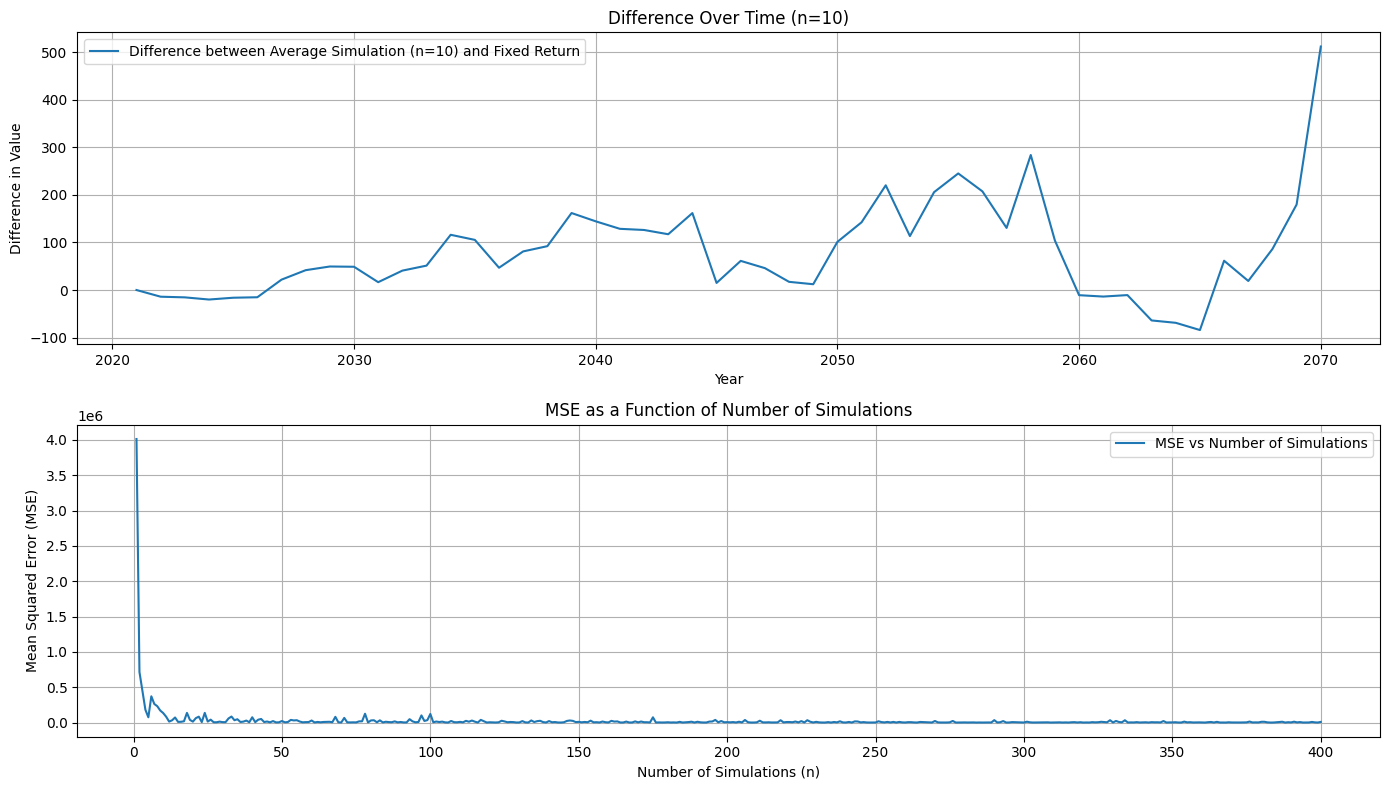

In [3]:
# 1c

import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_investment = 1000
mu = 0.04
sigma = 0.06
years = np.arange(2021, 2071)
time = years - 2021

# Fixed return rate simulation (from part 1a)
fixed_return_values = initial_investment * (1 + mu) ** time

# Function to perform simulations and calculate average and std deviation
def simulate_investment(n_simulations):
    simulations = np.zeros((n_simulations, len(years)))
    for i in range(n_simulations):
        returns = np.random.normal(mu, sigma, len(years))
        values = np.zeros(len(years))
        values[0] = initial_investment
        for t in range(1, len(years)):
            values[t] = values[t-1] * (1 + returns[t-1])
        simulations[i] = values
    average_simulation = np.mean(simulations, axis=0)
    return average_simulation

# Calculate MSE for different numbers of simulations
simulation_counts = np.arange(1, 401)
mse_values = []

for n in simulation_counts:
    average_simulation = simulate_investment(n)
    mse = np.mean((average_simulation - fixed_return_values) ** 2)
    mse_values.append(mse)

# Plot the difference between the average simulation and fixed return rate simulation for n=10
average_simulation_10 = simulate_investment(10)
difference_10 = average_simulation_10 - fixed_return_values

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(years, difference_10, label='Difference between Average Simulation (n=10) and Fixed Return')
plt.xlabel('Year')
plt.ylabel('Difference in Value')
plt.title('Difference Over Time (n=10)')
plt.legend()
plt.grid(True)

# Plot MSE as a function of the number of simulations
plt.subplot(2, 1, 2)
plt.plot(simulation_counts, mse_values, label='MSE vs Number of Simulations')
plt.xlabel('Number of Simulations (n)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE as a Function of Number of Simulations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 1c

Analysis:
The plot of MSE as a function of the number of simulations shows how the error decreases as more simulations are performed.
With different values of μ and σ:
Increasing μ would result in higher average investment values but should not affect the relative error (MSE).
Increasing σ would increase the variability in the returns, leading to higher MSE values, as the simulations would be more dispersed around the mean.

# 1d